## 3. Running the simulation

Perform network simulation with parameters established in "Construct Network"

In [12]:
from bmtk.simulator import pointnet

configure = pointnet.Config.from_json('simulation/config.json')
configure.build_env()
network = pointnet.PointNetwork.from_config(configure)
sim = pointnet.PointSimulator.from_config(configure, network)
sim.run()

2022-01-20 10:11:24,933 [INFO] Created log file
2022-01-20 10:11:25,024 [INFO] Batch processing nodes for V1/0.
2022-01-20 10:11:25,053 [INFO] Batch processing nodes for LGN/0.
2022-01-20 10:11:25,553 [INFO] Setting up output directory
2022-01-20 10:11:25,557 [INFO] Building cells.
2022-01-20 10:11:25,605 [INFO] Building recurrent connections
2022-01-20 10:11:45,001 [INFO] Build virtual cell stimulations for LGN_spikes
2022-01-20 10:11:49,461 [INFO] Network created.
2022-01-20 10:11:49,551 [INFO] Starting Simulation
2022-01-20 10:14:16,828 [INFO] Simulation finished, finalizing results.
2022-01-20 10:14:16,913 [INFO] Done.


## 4. Analyzing results

Results of the simulation, as specified in the config, are saved into the output directory. Using the analyzer functions, we can do things like plot the raster plot

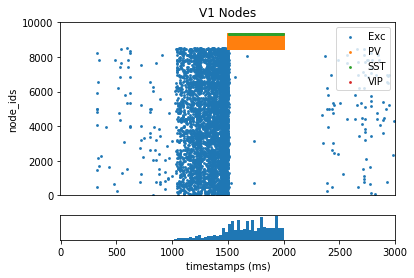

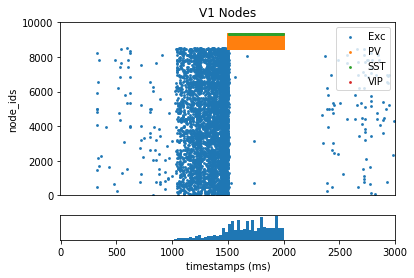

In [13]:
from bmtk.analyzer.spike_trains import plot_raster, plot_rates

plot_raster(config_file='simulation/config.json', group_by='pop_name')

Or we can plot the rates of the different populations

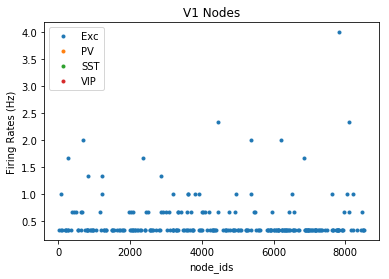

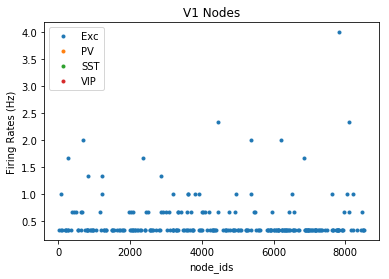

In [4]:
plot_rates(config_file='simulation/config.json', group_by='pop_name')

In our simulation_config.json in the reports section, we can see we also record the V_m (i.e membrane potential) of a select sample of cells. By default these files are written to an hdf5 file with the same name as the report (membrane_potential.h5), and we can use the analyzer to show the time course of some of these cells.

## 5. Additional Information

### Recording membrane potential  (and other cell properties).

By default bmtk will automatically record and save the spike-trains of our (non-virtual) cells. Sometimes it can be useful to record other properties besides spikes, like the membrane voltage traces, of all or a subsection of the cells. To do so we only need to open the _simulation_config.json_ with our prefered text editor and insert the following section:

```json
{
  "reports": {
    "membrane_potential": {
      "cells": {
        "population": "V1", 
        "node_id": [0, 20, 60, 80, 100]
      },
      "variable_name": "V_m",
      "module": "multimeter_report",
      "sections": "soma"
    }
  }
}
```

This will tell bmtk to record the "V_m" variable for selected cells with ids 0, 20, 60, 80, 100 - and save the results in a file _output/membrane_potential.h5_. After re-running the simulation the file will be generated, [according to the SONATA format](https://github.com/AllenInstitute/sonata/blob/master/docs/SONATA_DEVELOPER_GUIDE.md#frame-oriented-node-element-recordings), which we can read using hdf5 or bmtk like below:

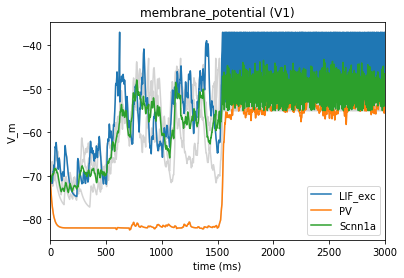

In [50]:
from bmtk.analyzer.compartment import plot_traces

_ = plot_traces(config_file='sim_ch05/config.json', group_by='pop_name')

### Perturbation simulations

A common use case is to mimick a network where the firing rate of select cells are being depressed or stimulated using current clamps or optogenetic methods. The best way to do this is by applying a current clamp in a similar manner used in [bionet](http://localhost:32000/notebooks/Workspace/bmtk/docs/tutorial/01_single_cell_clamped.ipynb).

The point_120cells network in the bmtk examples consists of 120 recurrently connected excitatory and inhibitory cells with randomized inputs. Normally the results without any type of perturbations will look as follows:
<img src="_static/_tutorial_images/raster_120cells_orig.png">

To artifically excite some of the cells we can open the config.json file and add the following section to the "inputs":
```json
{
  "exc_perturbation": {
    "input_type": "current_clamp",
    "module": "IClamp",
    "node_set": {
      "population": "cortex",
      "node_ids": [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
    },
    "amp": 230.0,
    "delay": 1.0,
    "duration": 3000.0
  }
}
```

This will apply a large step current for the duration of the simulation for cells 20 through 39. In this case we knew the exact node_ids of the cells we want to excite. However it is also possible to get a subset using a specific property, for example if we wanted to only select inhibitory L2/3 cells:
```json
{
  "node_set": {
    "population": "cortex",
    "ei": "i",
    "location": "L2/3"
  }
}
```

To simulate depression of cells 40 to 49 we will add another current_clamp but with a large negative current:
```json
{
  "inh_perturbation": {
    "input_type": "current_clamp",
    "module": "IClamp",
    "node_set": {
      "population": "cortex",
      "node_ids": [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
    },
    "amp": -230.0,
    "delay": 1.0,
    "duration": 3000.0
  }
}
```

After we rerun the simulation:
<img src="_static/_tutorial_images/raster_120cells_perturbed.png">


